# **Tabular Kaggle Project**

**Project Link:**

https://www.kaggle.com/competitions/playground-series-s4e1/overview


**Challenge Desciption:**

This project aims to predict whether a bank customer will churn (i.e., leave the bank) using historical customer data. The machine learning model will learn patterns from the past (train data) and then try to predict whether customers in the test dataset will churn.

**Dataset Desciption:**

The dataset contains 14 features for each customer, such as Credit Score, Geography, Gender, Age, Balance, Estimated Salary, and whether they have churned. The target variable is Exited, which is a binary classification problem.

### **Data Loading and Initial Look**

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [46]:
import pandas as pd

# Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# Basic info
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (165034, 14)
Test shape: (110023, 13)


In [47]:
print("Train Data:")
train

Train Data:


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [48]:
missing_values = train.isnull().sum()
print(missing_values)

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


* No missing values (train)



In [49]:
# Check data types and basic info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [50]:
feature_summary = pd.DataFrame({
    'Feature': ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
                'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
    'Type': ['Numerical', 'Categorical', 'Categorical', 'Numerical', 'Numerical',
             'Numerical', 'Numerical', 'Categorical (0/1)', 'Categorical (0/1)', 'Numerical'],
    'Example Values': [
        train['CreditScore'].unique()[:3],
        train['Geography'].unique(),
        train['Gender'].unique(),
        f"{train['Age'].min()} - {train['Age'].max()}",
        f"{train['Tenure'].min()} - {train['Tenure'].max()}",
        f"{train['Balance'].min()} - {train['Balance'].max()}",
        train['NumOfProducts'].unique(),
        train['HasCrCard'].unique(),
        train['IsActiveMember'].unique(),
        f"{train['EstimatedSalary'].min()} - {train['EstimatedSalary'].max()}"
    ],
    'Missing Values': [train[c].isnull().sum() for c in
                       ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
                        'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                        'EstimatedSalary']]
})

feature_summary

,Feature,Type,Example Values,Missing Values
0,CreditScore,Numerical,"[668, 627, 678]",0
1,Geography,Categorical,"[France, Spain, Germany]",0
2,Gender,Categorical,"[Male, Female]",0
3,Age,Numerical,18.0 - 92.0,0
4,Tenure,Numerical,0 - 10,0
5,Balance,Numerical,0.0 - 250898.09,0
6,NumOfProducts,Numerical,"[2, 1, 3, 4]",0
7,HasCrCard,Categorical (0/1),"[1.0, 0.0]",0
8,IsActiveMember,Categorical (0/1),"[0.0, 1.0]",0
9,EstimatedSalary,Numerical,11.58 - 199992.48,0


In [51]:
# Class distribution
train['Exited'].value_counts(normalize=True)

,proportion
Exited,
0,0.788401
1,0.211599


## Data Visualization

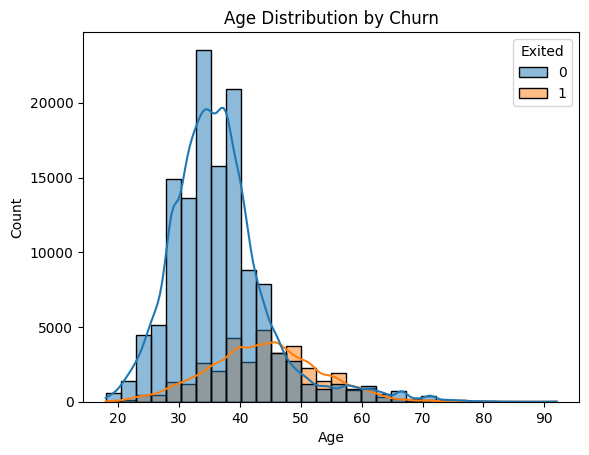

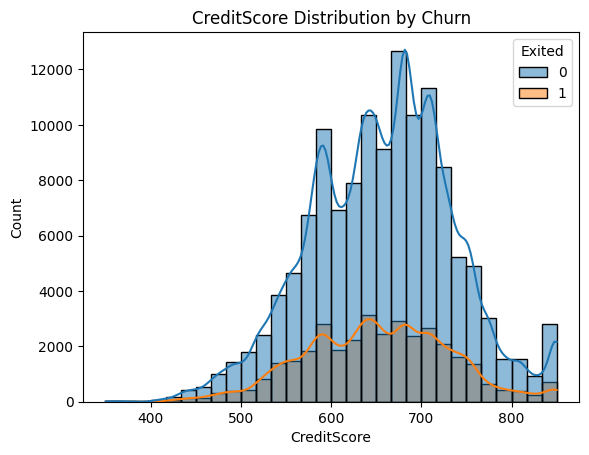

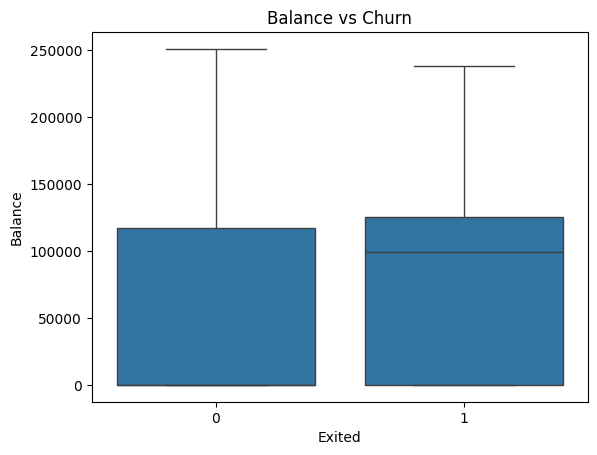

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=train, x='Age', hue='Exited', kde=True, bins=30)
plt.title('Age Distribution by Churn')
plt.show()

sns.histplot(data=train, x='CreditScore', hue='Exited', kde=True, bins=30)
plt.title('CreditScore Distribution by Churn')
plt.show()

sns.boxplot(data=train, x='Exited', y='Balance')
plt.title('Balance vs Churn')
plt.show()

## Data Cleaning and Preperation for Machine Learning

In [54]:
# Drop customer IDs and surnames from train and test data
train = train.drop(['CustomerId', 'Surname', 'id'], axis=1)
test = test.drop(['CustomerId', 'Surname', 'id'], axis=1)

* Columns like CustomerId, id, and Surname are identifiers or personal details that don't help the model learn patterns. By dropping them, I'm simplifying the dataset and focusing only on the useful features.

In [55]:
train = pd.get_dummies(train, columns=['Geography', 'Gender'], drop_first=True)
test = pd.get_dummies(test, columns=['Geography', 'Gender'], drop_first=True)

*  I'm converting the text-based columns Geography and Gender into numerical columns

## Machine Learning

In [56]:
from sklearn.model_selection import train_test_split

X = train.drop('Exited', axis=1)
y = train['Exited']

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

* Here, I'm separating my dataset into features (X) and the target column (y, which is whether a customer exited). Then I'm splitting this into training and validation sets—80% of the data is used for training, and 20% is saved to test how well the model performs. I'm using stratify=y to keep the class balance the same in both sets.

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Validation performance
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     26023
           1       0.72      0.53      0.61      6984

    accuracy                           0.86     33007
   macro avg       0.80      0.74      0.76     33007
weighted avg       0.85      0.86      0.85     33007



* I'm using a Random Forest classifier to train my model. It works by creating multiple decision trees and combining them for better accuracy.

* After training, I'm testing how well my model performs on the validation set by predicting customer exits and comparing them to the actual results. The classification_report shows me metrics like precision, recall, and F1-score, which help me understand the strengths and weaknesses of my model.